# API 사용예제

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

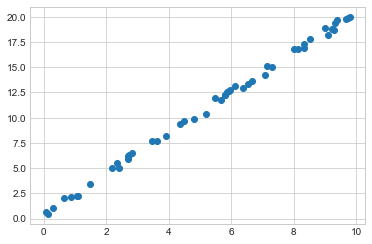

In [4]:
x = 10 * np.random.rand(50)
y = 2 * x + np.random.rand(50)
plt.scatter(x, y)
plt.show()

In [8]:
# 1. 적절한 estimator 클래스를 임포트해서 모델의 클래스 선택
from sklearn.linear_model import LinearRegression

In [13]:
# 2. 클래스를 원하는 값으로 인스턴스화해서 모델의 하이퍼파라미터 선택
model = LinearRegression(fit_intercept = True)
model

LinearRegression()

In [16]:
# 3. 데이터를 특징 배열과 대상 벡터로 배치
X = x[:, np.newaxis]   ## 특징 배열로 변환
X

array([[9.33313059],
       [8.3419062 ],
       [6.38644118],
       [9.21127859],
       [5.48447149],
       [6.53954067],
       [5.91375733],
       [9.01354348],
       [0.64438   ],
       [1.08294641],
       [8.1505935 ],
       [0.13115432],
       [5.80652156],
       [7.1451598 ],
       [2.33711358],
       [2.83762703],
       [2.69738845],
       [3.61095336],
       [5.95847674],
       [6.67145646],
       [4.48920064],
       [8.53161046],
       [3.9280161 ],
       [7.07813627],
       [2.71543784],
       [7.29570916],
       [5.79146912],
       [5.18994316],
       [9.37348959],
       [3.45107316],
       [0.05707851],
       [8.00852538],
       [0.30626374],
       [2.39826459],
       [1.46575759],
       [4.35166481],
       [0.86800842],
       [5.65840276],
       [1.05008199],
       [8.31671627],
       [9.30218031],
       [2.69153609],
       [9.66610359],
       [5.85226099],
       [9.74239489],
       [9.79989217],
       [4.82216303],
       [2.187

In [17]:
# 4. 모델 인스턴스의 fit() 메서드를 호출해 모델을 데이터에 적합
model.fit(X, y)

LinearRegression()

In [18]:
model.coef_

array([2.00280698])

In [19]:
model.intercept_

0.5059561863903976

In [21]:
# 5. 모델을 새 데이터에 대해서 적용
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

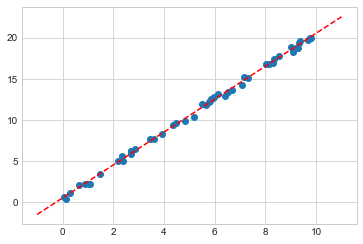

In [25]:
plt.scatter(x, y)
plt.plot(xfit, yfit, '--', c = 'r')
plt.show()

# 예제데이터 세트

In [28]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [36]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [40]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


# MODEL_SELECTION MODULE

### 1. 학습용 데이터와 테스트 데이터로 분리
### 2. 교차 검증(Cross Validation) 분할 및 평가
### 3. Estimator의 하이퍼 파라미터 튜닝을 위한 다양한 함수와 클래스 제공

## train_test_split() : 학습/테스트 데이터 세트 분리

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size = 0.3)

model = LinearRegression()
model.fit(X_train, y_train)

print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.5529539352923598
평가 데이터 점수: 0.41954204128039907


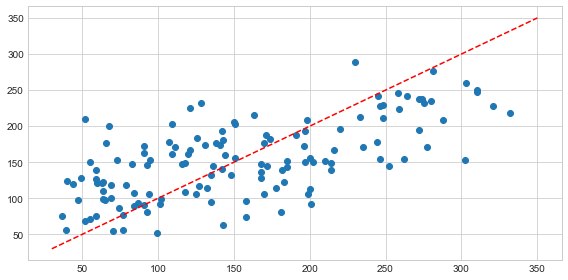

In [48]:
predicted = model.predict(X_test)
expected = y_test
plt.figure(figsize = (8, 4))
plt.scatter(expected, predicted)
plt.plot([30, 350], [30, 350], '--r')
plt.tight_layout()

### cross_val_score() : 교차 검증

In [53]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_val_score(model, diabetes.data, diabetes.target, cv = 5)

print("교차 검증 정확도: {}".format(scores))
print('교차 검증 정확도: {} +/- {}'.format(np.mean(scores), np.std(scores)))

교차 검증 정확도: [0.42955643 0.52259828 0.4826784  0.42650827 0.55024923]
교차 검증 정확도: 0.4823181221114939 +/- 0.04926619776563216


### GridSearchCV : 교차 검증과 최적 하이퍼 파라미터 찾기

#### 1. 훈련 단계에서 학습한 파라미터에 영향을 받아서 최상의 파라미터를 찾는 일은 항상 어려운 문제
#### 2. 다양한 모델의 훈련 과정을 자동화하고, 교차 검사를 사용해 최적 값을 제공하는 도구 필요

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import pandas as pd

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha = alpha)

gs = GridSearchCV(estimator = Ridge(), param_grid = param_grid, cv = 10)
res = gs.fit(diabetes.data, diabetes.target)

print('최적의 점수: {}'.format(res.best_score_))
print('최적 파라미터: {}'.format(res.best_params_))
print(gs.best_estimator_)
pd.DataFrame(res.cv_results_)

최적의 점수: 0.46332405415175926
최적 파라미터: {'alpha': 0.1}
Ridge(alpha=0.1)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002194,0.004942,0.000499,0.000499,0.001,{'alpha': 0.001},0.554415,0.233686,0.356799,0.620259,0.267033,0.619397,0.419907,0.433019,0.433431,0.684984,0.462293,0.145848,3
1,0.000299,0.000457,0.000000,0.000000,0.01,{'alpha': 0.01},0.546297,0.244132,0.368901,0.613732,0.271717,0.623089,0.426074,0.424759,0.429484,0.680912,0.462910,0.141446,2
2,0.000698,0.000457,0.000299,0.000457,0.1,{'alpha': 0.1},0.526550,0.244987,0.383530,0.606594,0.286094,0.618033,0.431230,0.441788,0.431968,0.662466,0.463324,0.132681,1
3,0.000100,0.000299,0.000299,0.000457,1,{'alpha': 1},0.421593,0.168442,0.358004,0.512608,0.284928,0.514264,0.388246,0.484448,0.396502,0.525132,0.405417,0.108385,4
4,0.000598,0.000489,0.000299,0.000457,10,{'alpha': 10},0.159386,-0.081177,0.152190,0.165690,0.119349,0.186933,0.158147,0.203748,0.153627,0.189440,0.140733,0.077298,5
5,0.000299,0.000457,0.000399,0.000488,100,{'alpha': 100},0.012468,-0.234480,0.013522,-0.012820,0.004838,0.022647,0.022028,-0.009908,0.015589,0.026427,-0.013969,0.074561,6
6,0.000352,0.000449,0.000399,0.000488,1000,{'alpha': 1000},-0.009602,-0.258118,-0.007849,-0.038479,-0.012933,-0.000932,0.001768,-0.042679,-0.004652,0.002744,-0.037073,0.075191,7


#### 3. multiprocessing을 이용한 GridSearchCV

In [58]:
import multiprocessing
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()

param_grid = [{'penalty' : ['l1', 'l2'], 
              'C' : [1.5, 2.0, 2.5, 3.0, 3.5]}]

gs = GridSearchCV(estimator = LogisticRegression(), 
                  param_grid = param_grid, 
                  scoring = 'accuracy', cv = 10, 
                  n_jobs = multiprocessing.cpu_count())
result = gs.fit(iris.data, iris.target)

print('최적의 점수: {}'.format(result.best_score_))
print('최적 파라미터: {}'.format(result.best_params_))
print(gs.best_estimator_)
pd.DataFrame(result.cv_results_)

최적의 점수: 0.9800000000000001
최적 파라미터: {'C': 2.5, 'penalty': 'l2'}
LogisticRegression(C=2.5)


C:\Users\LEE\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.97333333        nan 0.97333333        nan 0.98
        nan 0.98              nan 0.98      ]
  warnings.warn(
C:\Users\LEE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000299,0.000457,0.000000,0.000000,1.5,l1,"{'C': 1.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,0.037500,0.002325,0.000598,0.000488,1.5,l2,"{'C': 1.5, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
2,0.000299,0.000457,0.000000,0.000000,2.0,l1,"{'C': 2.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
3,0.038796,0.003381,0.000598,0.000489,2.0,l2,"{'C': 2.0, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
4,0.000299,0.000457,0.000000,0.000000,2.5,l1,"{'C': 2.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
5,0.038696,0.003051,0.000299,0.000457,2.5,l2,"{'C': 2.5, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
6,0.000399,0.000488,0.000000,0.000000,3.0,l1,"{'C': 3.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,0.038896,0.002230,0.000399,0.000489,3.0,l2,"{'C': 3.0, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
8,0.000100,0.000299,0.000000,0.000000,3.5,l1,"{'C': 3.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
9,0.035505,0.003160,0.000598,0.000489,3.5,l2,"{'C': 3.5, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1


### preprocessing 데이터 전처리 모듈

#### 1.데이터의 특징 스케일링(feature scaling)을 위한 방법으로 표준화(Standardization)와 정규화(normalization) 사용
#### 2. scikit-learn에서는 개별 벡터 크기를 맞추는 형태로 정규화

### StandardScaler : 표준화 클래스

In [61]:
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df.describe()    # 표준통계량

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)
iris_df_scaled = pd.DataFrame(data = iris_scaled, 
                              columns = iris.feature_names)
iris_df_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [63]:
X_train, X_test, y_train, y_test = train_test_split(iris_df_scaled, 
                                                    iris.target, 
                                                    test_size = 0.3)

model = LogisticRegression()
model.fit(X_train, y_train)

print('훈련 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('테스트 데이터 점수: {}'.format(model.score(X_test, y_test)))

훈련 데이터 점수: 0.9523809523809523
테스트 데이터 점수: 0.9555555555555556


### MinMaxScaler : 정규화 클래스

In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
iris_scaled = scaler.fit_transform(iris_df)
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)
iris_df_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [68]:
X_train, X_test, y_train, y_test = train_test_split(iris_df_scaled, 
                                                    iris.target, 
                                                    test_size = 0.3)

model = LogisticRegression()
model.fit(X_train, y_train)

print('훈련 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('테스트 데이터 점수: {}'.format(model.score(X_test, y_test)))

훈련 데이터 점수: 0.9238095238095239
테스트 데이터 점수: 0.9333333333333333


# 성능 평가 지표

## 정확도 (Accuracy)

### 1. 정확도는 전체 예측 데이터 건수 중 예측 결과가 동일한 데이터 건수로 계산

### 2. scikit-learn에서는 accuracy_score 함수를 제공

In [79]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples = 1000,
                           n_features = 2, 
                           n_informative = 2,
                           n_redundant = 0,
                           n_clusters_per_class = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model = LogisticRegression().fit(X_train, y_train)

print('훈련 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

predict = model.predict(X_test)
print('정확도: {}'.format(accuracy_score(y_test, predict)))

### 데이터의 분포도가 균일하지 않은 경우에도 높은 점수가 나올 수도 있음.
### 즉, 정확도만으로 모델을 판단해선 절대 안됨 !

훈련 데이터 점수: 0.9842857142857143
평가 데이터 점수: 0.9766666666666667
정확도: 0.9766666666666667


## 오차 행렬(Confusion Matrix)

### True Negative: 예측값을 Negative 값 0으로 예측했고, 실제 값도 Negative 값 0
### False Positive : 예측값을 Positive 값 1로 예측했는데, 실제 값은 Negative 값 0
### False Negative : 예측값을 Negative 값 0으로 예측했는데, 실제 값은 Positive 값 1
### True Positive : 예측값을 Positive 값 1로 예측했고, 실제 값도 Positive 값 1

In [92]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true = y_test, y_pred = predict)
print(confmat)

[[148   1]
 [  6 145]]


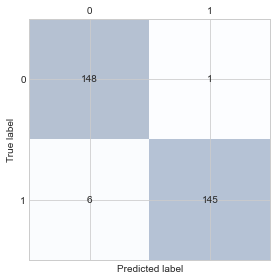

In [93]:
fig, ax = plt.subplots(figsize = (4, 4))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x = j, y = i, s = confmat[i, j], va = 'center',
               ha = 'center')
        
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

## 정밀도(Precision)와 재현율(Recall)

###  정밀도 = TP / (FP + TP)
###  재현율 = TP / (FN + TP)
###  정확도 = (TN + TP) / (TN + FP + FN + TP)
###  오류율 = (FN + FP) / (TN + FP + FN + TP)

In [94]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, predict)
recall = recall_score(y_test, predict)

print('정밀도: {}'.format(precision))
print('재현율: {}'.format(recall))

### 업무 특성에 따라 정밀도, 재현율 서로 중요도가 다를 수 있다.

정밀도: 0.9931506849315068
재현율: 0.9602649006622517


## F1 Score(F-measure)

### 정밀도와 재현율을 결합한 지표
### 정밀도와 재현율이 어느 한쪽으로 치우치지 않을 때 높은 값을 가짐


### F1 = 2 * (precision * recall) / (precision + recall)

In [95]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, predict)

print('F1 Score: {}'.format(f1))

F1 Score: 0.9764309764309764


## ROC 곡선과 AUC

### 1. ROC 곡선은 FPR(False Positive Rate)이 변할 때, TPR(True Positive Rate)이 어떻게 변하는지 나타내는 곡선
#### TPR(True Positive Rate) : TP / (FN + TP), 재현율
#### TNR(True Negative Rate): TN / (FP + TN)
#### FPR(False Positive Rate): FP / (FP + TN), 1 - TNR

### 2. AUC(Area Under Curve) 값은 ROC 곡선 밑에 면적을 구한 값 (1이 가까울수록 좋은 값)

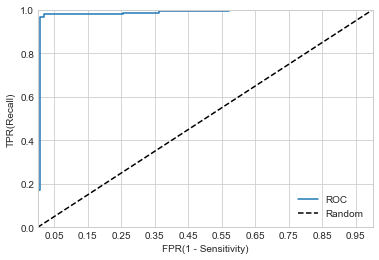

In [97]:
from sklearn.metrics import roc_curve

pred_proba_class1 = model.predict_proba(X_test)[:, 1]
fprs, tprs, threshold = roc_curve(y_test, pred_proba_class1)

plt.plot(fprs, tprs, label = 'ROC')
plt.plot([0, 1], [0, 1], '--k', label = 'Random')
start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('FPR(1 - Sensitivity)')
plt.ylabel('TPR(Recall)')
plt.legend()
plt.show()


### ROC 밑의 면적 = AUC 
### Random 선에 가까울수록 성능이 안좋은 결과를 보임, 현 그래프는 성능이 준수한 편임.


In [101]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, predict)

print('ROC AUC Score: {}'.format(roc_auc))

ROC AUC Score: 0.9767767456331392
